<a href="https://colab.research.google.com/github/WONI2/python_study/blob/main/seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# seaborn

import numpy as np
import pandas as pd
import seaborn as sns
import os


In [3]:
iris = sns.load_dataset("iris") #붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


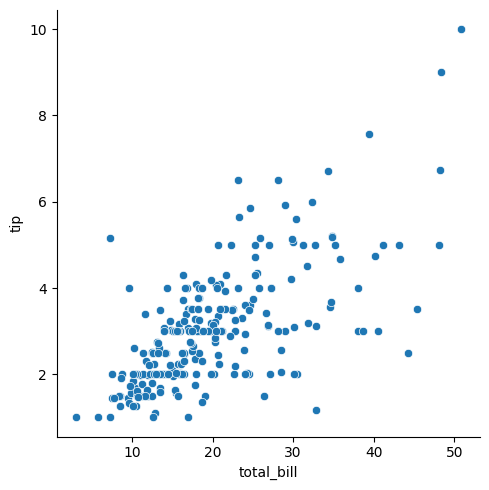

In [6]:
# 분석하고자 하는 데이터가 numerical일 때
# 1. sns.replot(x축 데이터, y축 데이터, data)
# 2. sns.scatterplot(data,x축데이터,y축 데이터) : 산포도

sns.relplot(x="total_bill", y="tip", data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

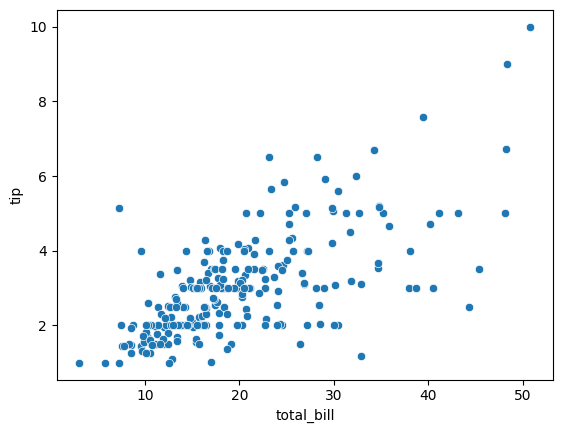

In [7]:
sns.scatterplot(x="total_bill", y="tip", data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

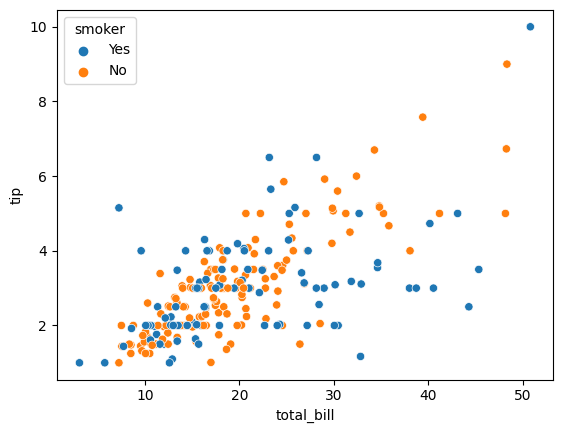

In [8]:
sns.scatterplot(data=tips, x="total_bill",y="tip",hue="smoker") # 카테고리형 변수가 섞여 있는 경우: hue 파라미터에 카테고리 변수를 지정하면 카테고리값에 따라 색상이 달라짐 

<Axes: xlabel='total_bill', ylabel='tip'>

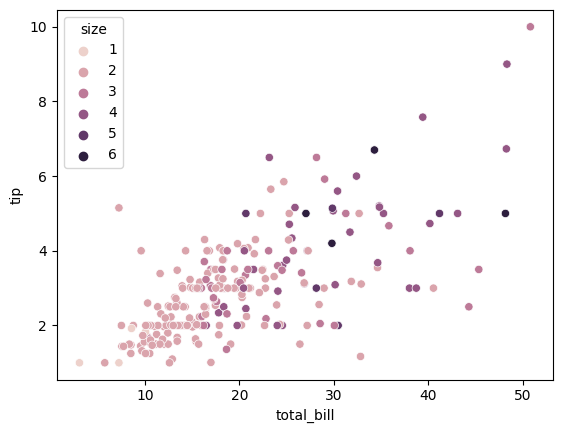

In [9]:
sns.scatterplot(data=tips, x="total_bill",y="tip",hue="size") #size에 numerical변수 이름을 지정하면 변수 값에 따라 크기가 달라짐

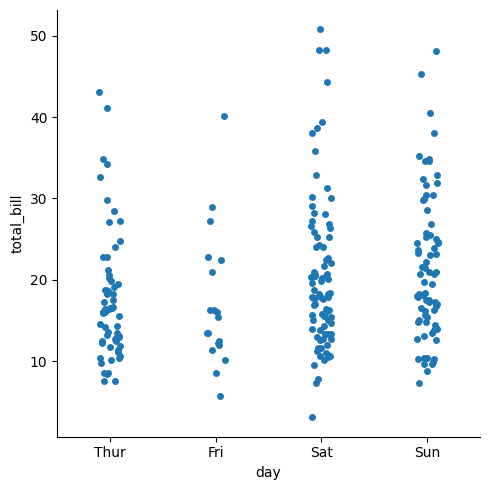

In [10]:
sns.catplot(x="day",y="total_bill",data=tips) #요일에 따른 전체 지불 금액

<Axes: xlabel='day', ylabel='total_bill'>

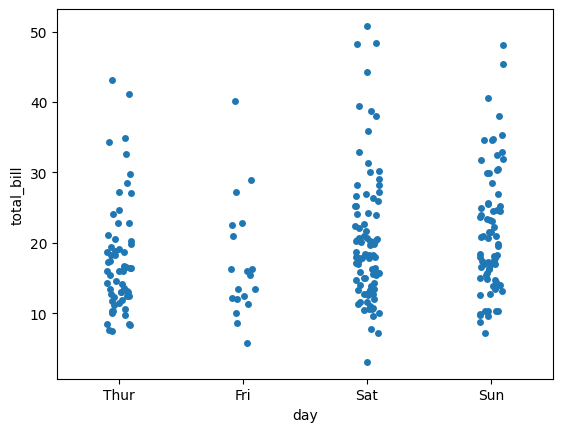

In [11]:
sns.stripplot(x="day", y="total_bill", data=tips) #sns.stripplot(x축 데이터,y축 데이터,data) :scatter plot처럼 모든 데이터를 점으로 그려줌 

<Axes: xlabel='day', ylabel='total_bill'>

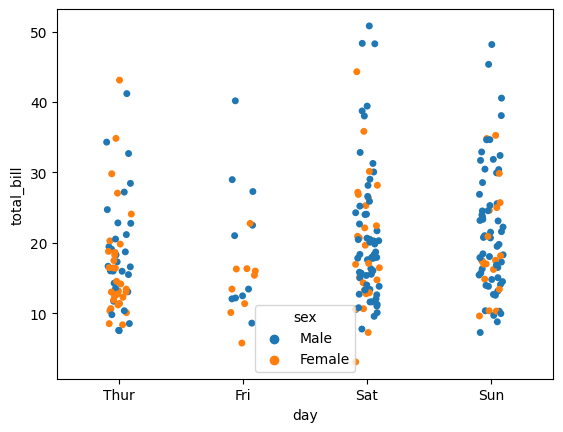

In [12]:
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True) # hue 추가 가능

<Axes: xlabel='day', ylabel='total_bill'>

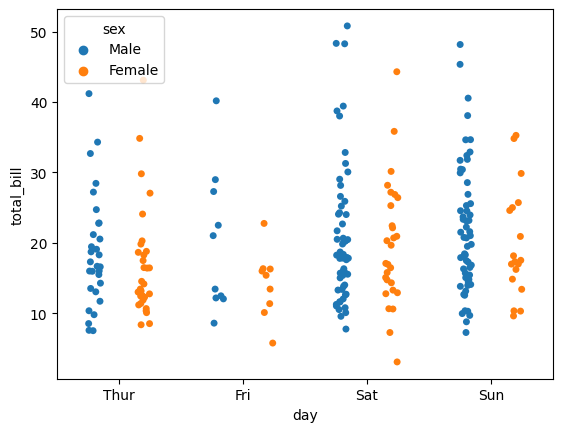

In [13]:
sns.stripplot(x="day", y="total_bill", hue="sex",
              data=tips, jitter=True, dodge=True) 
# dodge 옵션 쓰면 남여 따로 볼 수 있음

<Axes: xlabel='day', ylabel='total_bill'>

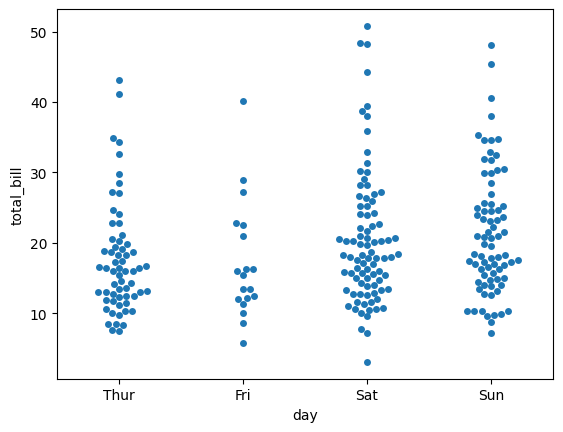

In [14]:
sns.swarmplot(x="day", y="total_bill", data=tips) 
#swamplot은 stripplot과 비슷하지만 데이털르 나타내는 점이 겹치지 않도록 나타냄. sns.swarmplot(x축 데이터,y축 데이터,data)

<Axes: xlabel='day', ylabel='total_bill'>

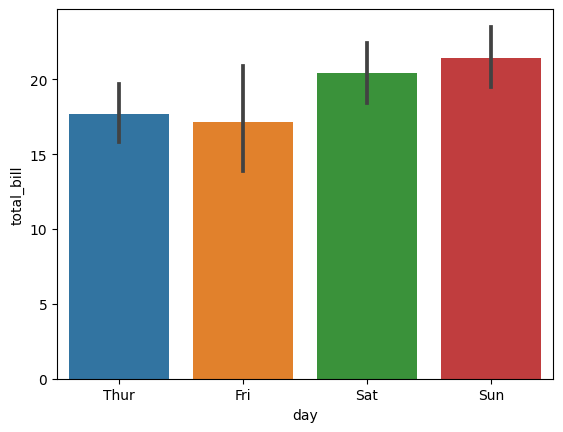

In [15]:
sns.barplot(x="day", y="total_bill", data=tips) 
#sns.barplot(x축 데이터,y축 데이터,data) : 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트 생성

In [16]:
#타이타닉 data에 적용해보기
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


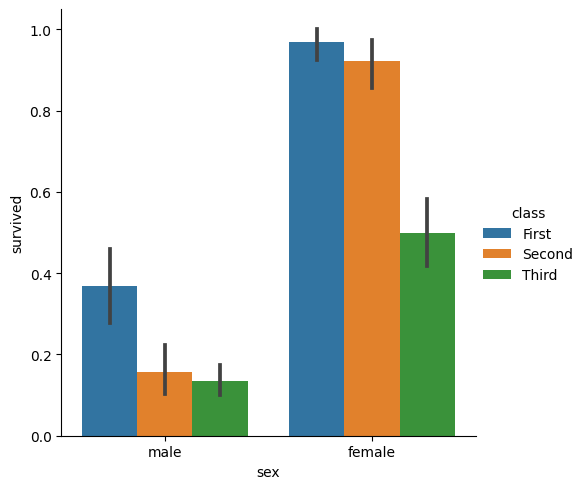

In [17]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic) 
#catplot에 kind="bar"를 이용 bar plot과 같이 표현 가능

<Axes: >

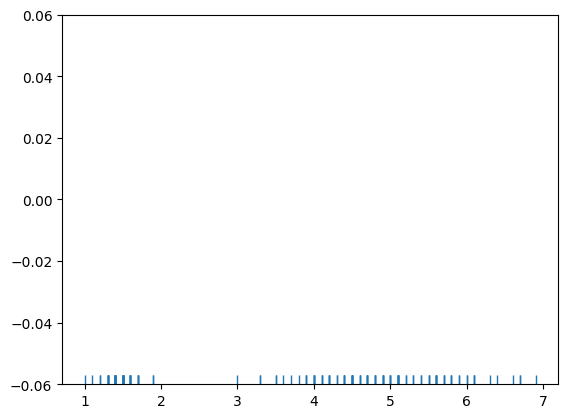

In [18]:
#sns.rugplot(data)
sns.rugplot(iris.petal_length.values)

<ipython-input-19-dcc2d7e1819c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris.petal_length.values, kde=True, rug=True, color="red")


<Axes: ylabel='Density'>

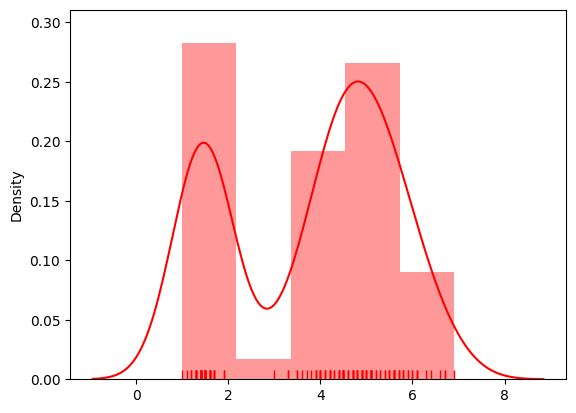

In [19]:
sns.distplot(iris.petal_length.values, kde=True, rug=True, color="red")

<Axes: xlabel='class', ylabel='count'>

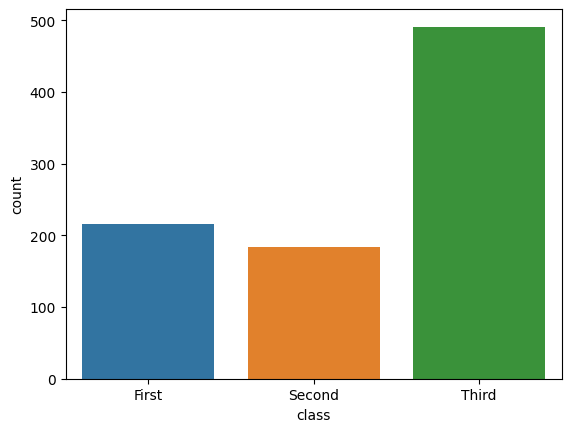

In [20]:
sns.countplot(x="class", data=titanic)

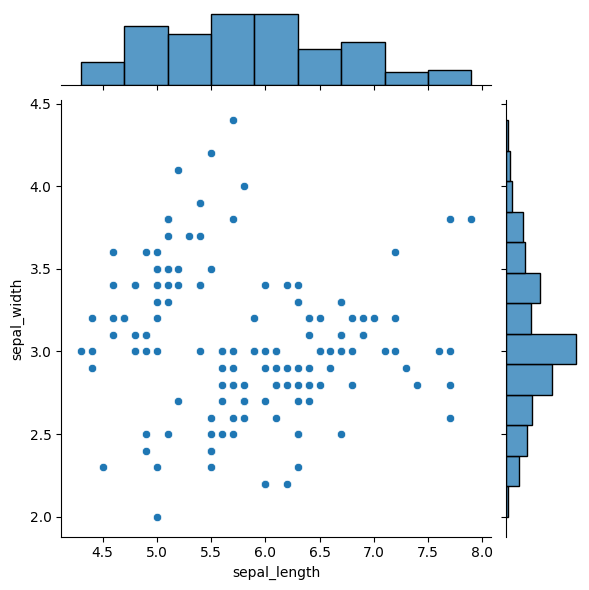

In [21]:
sns.jointplot(x="sepal_length",y="sepal_width",data=iris) #kind = 'scatter' 일 때

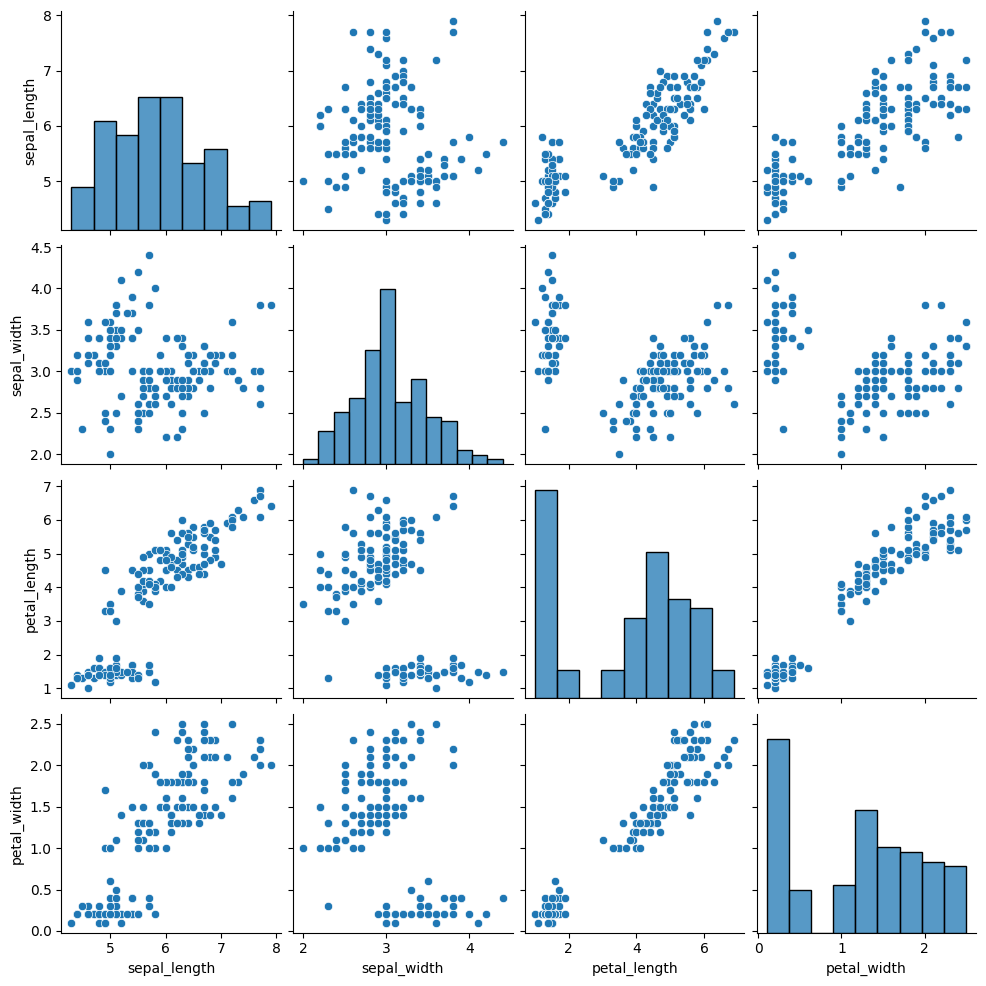

In [22]:
# pair plot : 데이터프레임을 인수로 받아 그리드 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그려준다. 
# sns.pairplot(data)
sns.pairplot(iris)


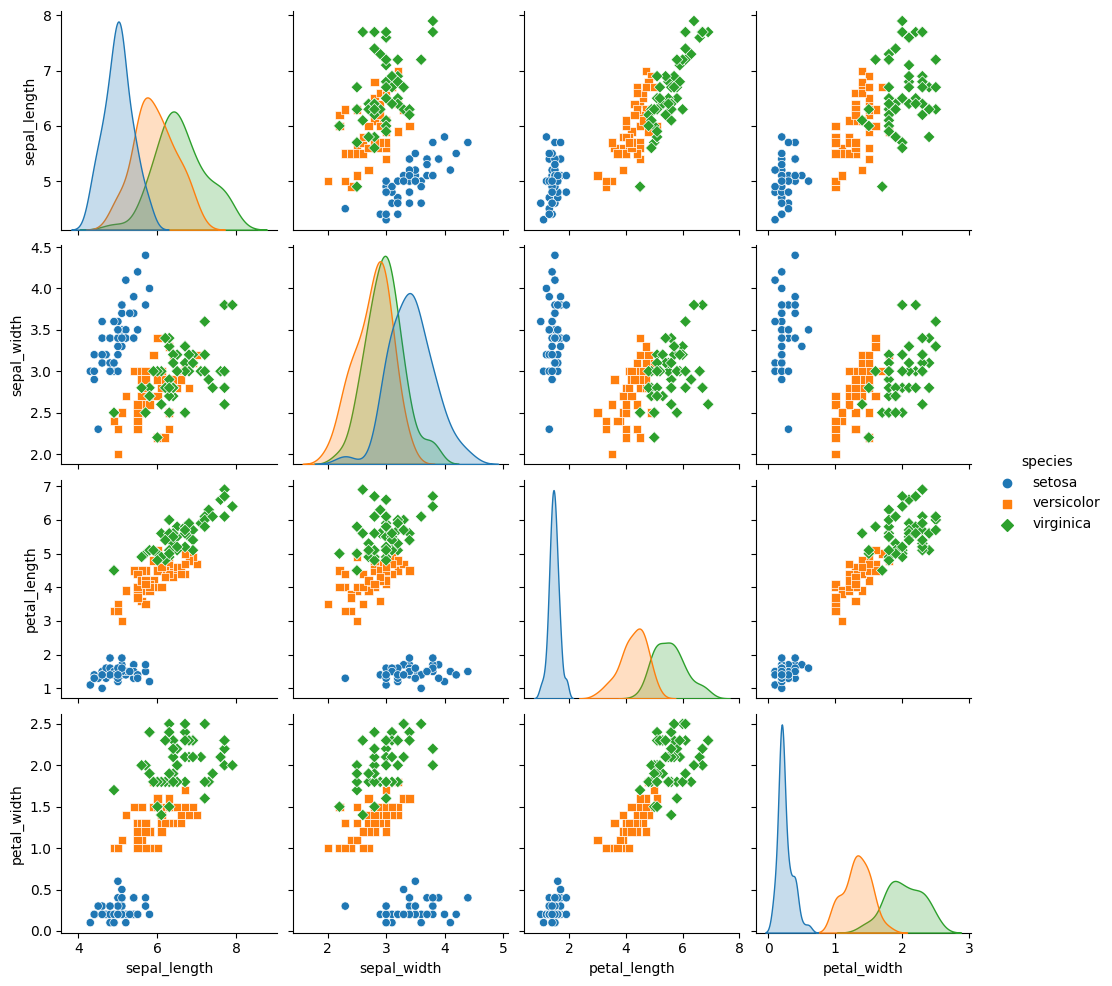

In [23]:
# 종에 따른 분류가 되어있지 않은 경우 hue param을 이용. markers의 종류가 matplorlib과 같음
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

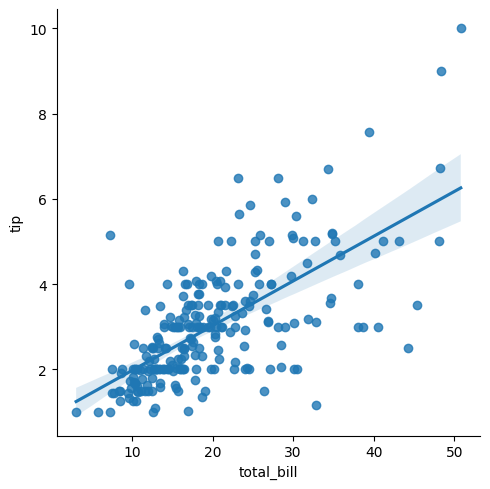

In [24]:
# 실제 replot보다 lmplot의 이용이 많은데, hue param이 적용되기 때문
sns.lmplot(x="total_bill", y="tip", data=tips)

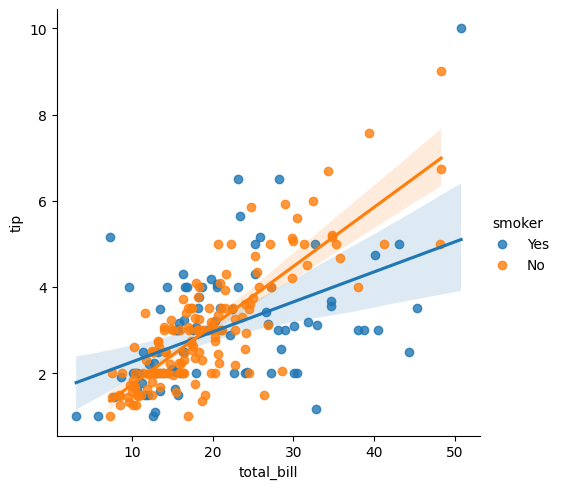

In [25]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips) #smoker에 따라 색상 지정 가능